# Import Library

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

# Reading Dataset

In [121]:
data = pd.read_csv("water_potability.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# EDA


## Detect Outliers Overall

<Axes: >

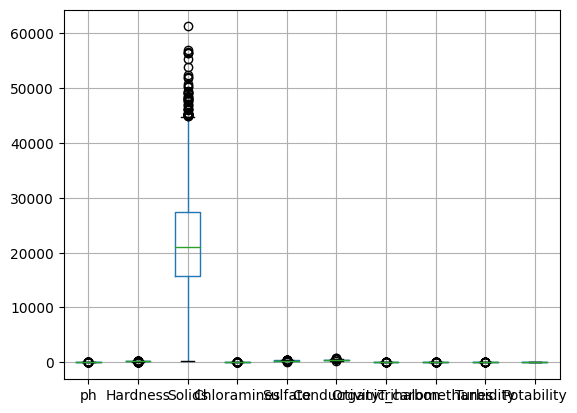

In [122]:
data.boxplot(column = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])

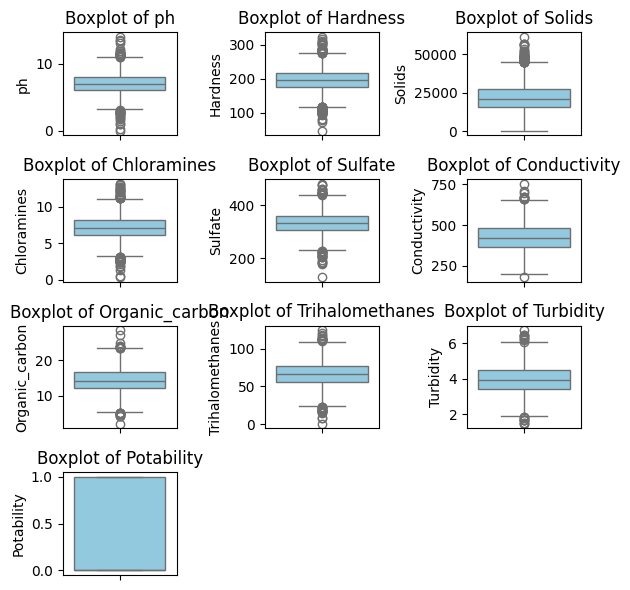

In [123]:
# Set the number of features
num_features = data.select_dtypes(include='number').shape[1]

# Calculate the number of rows and columns for the subplots
num_cols = int(num_features**0.5)  # Square root to get columns
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division for rows

# Create a square figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6, 6))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting the boxplot for each feature
for i, column in enumerate(data.select_dtypes(include='number').columns):
    sns.boxplot(y=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Removing Outliers

In [124]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
print(data_no_outliers)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

## Removing missing value

In [149]:
data_cleaned = data_no_outliers.dropna()
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1801.0,7.073586,1.437848,3.148712,6.110545,7.027297,7.992750,10.905076
Hardness,1801.0,196.326474,29.439876,117.791230,177.734357,197.439216,215.497882,275.746716
Solids,1801.0,21529.133632,8063.878952,320.942611,15457.498662,20526.666156,26744.301742,44652.363872
Chloramines,1801.0,7.129412,1.431738,3.181183,6.184710,7.135497,8.066654,11.086526
Sulfate,1801.0,333.556759,37.528731,229.575561,308.482695,332.766156,358.193121,437.647163
Conductivity,1801.0,425.814323,79.856804,201.619737,366.558131,422.039495,481.901929,652.537592
Organic_carbon,1801.0,14.409146,3.212541,5.512040,12.230908,14.352905,16.761625,23.234326
Trihalomethanes,1801.0,66.343796,15.566507,23.792950,55.961613,66.163439,77.261468,108.849568
Turbidity,1801.0,3.971417,0.758867,1.872573,3.445028,3.969318,4.508705,6.083772
Potability,1801.0,0.392560,0.488456,0.000000,0.000000,0.000000,1.000000,1.000000


In [150]:
counts = data_cleaned['Potability'].value_counts()
print(counts)
# Calculate percentages
percentages = counts / counts.sum() * 100

# Display results
print(percentages)

Potability
0    1094
1     707
Name: count, dtype: int64
Potability
0    60.744031
1    39.255969
Name: count, dtype: float64


## Plotting the Correlation Matrix

<Axes: >

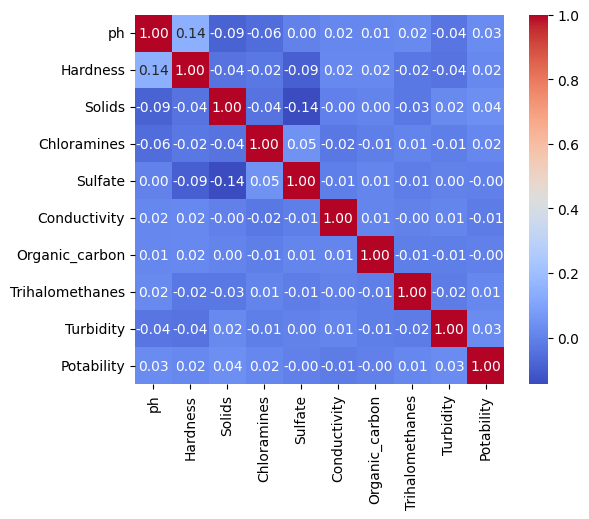

In [128]:
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

## Ploting the Histogram of each feature

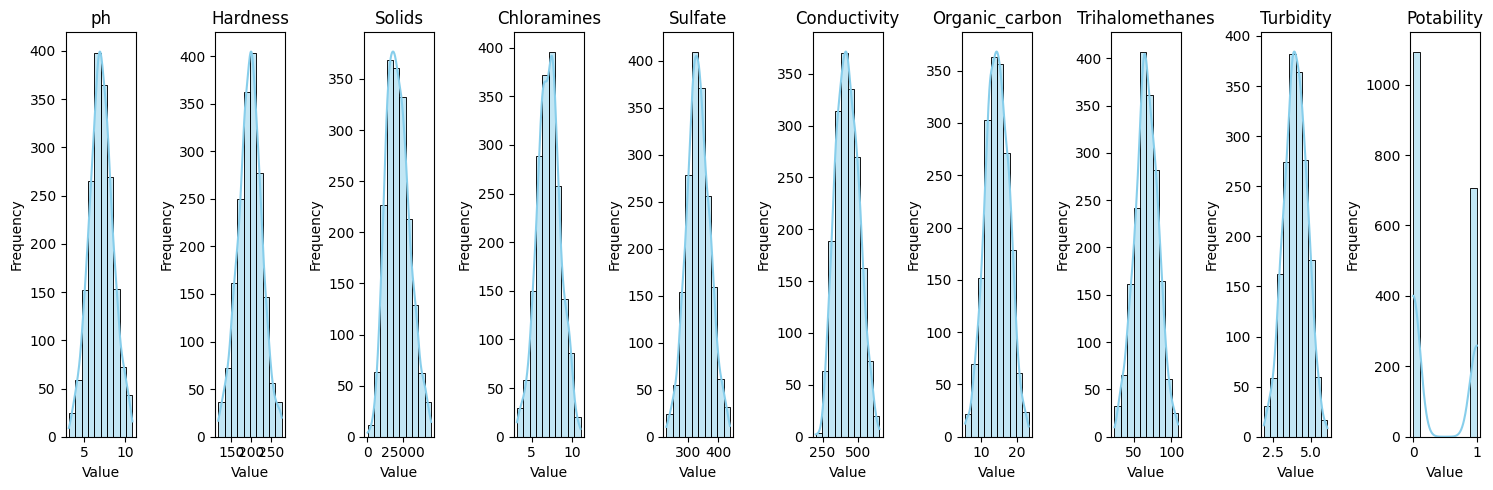

In [129]:
# Set the number of features
num_features = data_cleaned.select_dtypes(include='number').shape[1]

# Create a single figure with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

# Plotting the distribution for each feature in smaller axes
for i, column in enumerate(data_cleaned.select_dtypes(include='number').columns):
    sns.histplot(data_cleaned[column], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature Engineering


## 1. Normalizing the whole dataset (MinMax)

In [130]:
original_data = data_cleaned.copy()
original_data.drop(columns='Potability', inplace=True)
DatasetScaler = preprocessing.MinMaxScaler()
# Learn the whole dataset
col_names = original_data.columns
features = original_data[col_names]
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
case1DataFrame = pd.DataFrame(features, columns = col_names)
case1DataFrame['Potability'] = data_cleaned['Potability'].reset_index(drop=True)

column_MinMax_Scalers = {}

col_names = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
 # Learn each column
for column in col_names:
    column_scaler = None

    column_scaler = preprocessing.MinMaxScaler()
    column_scaler.fit(original_data[column].values.reshape(-1,1))
    column_MinMax_Scalers[column] = column_scaler


## 2. Normalization (Standardized)

In [133]:
original_data = data_cleaned.copy()
original_data.drop(columns='Potability', inplace=True)
DatasetScaler = preprocessing.StandardScaler()
# Learn the whole dataset
col_names = original_data.columns
features = original_data[col_names]
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
case2DataFrame = pd.DataFrame(features, columns = col_names)
case2DataFrame = pd.DataFrame(features, columns = col_names)
case2DataFrame['Potability'] = data_cleaned['Potability'].reset_index(drop=True)

column_Standard_Scalers = {}

col_names = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
 # Learn each column
for column in col_names:
    column_scaler = None

    column_scaler = preprocessing.StandardScaler()
    column_scaler.fit(original_data[column].values.reshape(-1,1))
    column_Standard_Scalers[column] = column_scaler

## 3. Projection Matrix

In [134]:
## Generate A random Matrix with the size of (9 x 6)
def generate_random_matrix(rows, cols):
    return np.random.rand(rows, cols)
projection_matrix = generate_random_matrix(9, 7)
print(projection_matrix)

case3DataFrame = np.dot(original_data, projection_matrix)

[[0.12088289 0.55768968 0.33776145 0.44312619 0.62150759 0.26591885
  0.56442194]
 [0.25042909 0.20780249 0.12063032 0.97652527 0.77065973 0.16974569
  0.43091746]
 [0.62233369 0.1894408  0.48035482 0.88137424 0.600023   0.95703375
  0.74028387]
 [0.19126486 0.33380452 0.23155405 0.9055766  0.95530385 0.17769388
  0.65336464]
 [0.20308656 0.78435717 0.63270442 0.57992067 0.80518118 0.70428983
  0.89728313]
 [0.28699302 0.48750591 0.06010045 0.61835412 0.64015609 0.51652157
  0.79480885]
 [0.35244338 0.30565923 0.03639379 0.7129651  0.67540527 0.96190225
  0.52903363]
 [0.34121528 0.02979182 0.27542205 0.45280512 0.66068025 0.4815378
  0.10389131]
 [0.72296924 0.78871743 0.38246656 0.45498685 0.84452137 0.68849465
  0.86676406]]


In [135]:
print(case3DataFrame.shape)

(1801, 7)


## 4. Feature Extraction

In [136]:
case4DataFrame = data_cleaned.copy()
case4DataFrame.drop(columns='Potability', inplace=True)
case4DataFrame.drop(columns='Solids', inplace=True)

## 5. Using Original Dataset

In [137]:
case5DataFrame = data_cleaned.copy()
case5DataFrame.drop(columns='Potability', inplace=True)

# Training Decision Tree Model

In [138]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

## Training and Evaluate Case 1

In [139]:
Case1_X_train, Case1_X_test, Case1_Y_train, Case1_Y_test = train_test_split(case1DataFrame.drop(columns=['Potability']), case1DataFrame['Potability'], test_size=0.3, random_state=1) # 70% training and

In [140]:
clf = DecisionTreeClassifier()
clf = clf.fit(Case1_X_train, Case1_Y_train)#Predict the response for test dataset
y_pred = clf.predict(Case1_X_test)
print("Accuracy:", metrics.accuracy_score(Case1_Y_test, y_pred))
print("F1 Score:", metrics.f1_score(Case1_Y_test, y_pred))

Accuracy: 0.5878003696857671
F1 Score: 0.4600484261501211


## Training and Evaluate Case 2

In [141]:
Case2_X_train, Case2_X_test, Case2_Y_train, Case2_Y_test = train_test_split(case2DataFrame.drop(columns=['Potability']), case2DataFrame['Potability'], test_size=0.3, random_state=1) # 70% training and

In [142]:
clf = DecisionTreeClassifier()
clf = clf.fit(Case2_X_train, Case2_Y_train)
#Predict the response for test dataset
y_pred = clf.predict(Case2_X_test)
print("Accuracy:", metrics.accuracy_score(Case2_Y_test, y_pred))
print("F1 Score:", metrics.f1_score(Case2_Y_test, y_pred))

Accuracy: 0.5841035120147874
F1 Score: 0.460431654676259


## Training and Evaluate Case 3



In [143]:
Case3_X_train, Case3_X_test, Case3_Y_train, Case3_Y_test = train_test_split(case3DataFrame, data_cleaned['Potability'].reset_index(drop=True), test_size=0.3, random_state=1) # 70% training and

In [144]:
clf = DecisionTreeClassifier()
clf = clf.fit(Case3_X_train, Case3_Y_train)
#Predict the response for test dataset
y_pred = clf.predict(Case3_X_test)
print("Accuracy:", metrics.accuracy_score(Case3_Y_test, y_pred))
print("F1 Score:", metrics.f1_score(Case3_Y_test, y_pred))

Accuracy: 0.5508317929759704
F1 Score: 0.39401496259351626


## Training and Evaluate Case 4



In [145]:
Case4_X_train, Case4_X_test, Case4_Y_train, Case4_Y_test = train_test_split(case4DataFrame, data_cleaned['Potability'].reset_index(drop=True), test_size=0.3, random_state=1) # 70% training and

In [146]:
clf = DecisionTreeClassifier()
clf = clf.fit(Case4_X_train, Case4_Y_train)
#Predict the response for test dataset
y_pred = clf.predict(Case4_X_test)
print("Accuracy:", metrics.accuracy_score(Case4_Y_test, y_pred))
print("F1 Score:", metrics.f1_score(Case4_Y_test, y_pred))

Accuracy: 0.5878003696857671
F1 Score: 0.48018648018648014


## Training and Evaluate Case 5

In [147]:
Case5_X_train, Case5_X_test, Case5_Y_train, Case5_Y_test = train_test_split(case5DataFrame, data_cleaned['Potability'].reset_index(drop=True), test_size=0.3, random_state=1) # 70% training and

In [148]:
clf = DecisionTreeClassifier()
clf = clf.fit(Case5_X_train, Case5_Y_train)
#Predict the response for test dataset
y_pred = clf.predict(Case5_X_test)
print("Accuracy:", metrics.accuracy_score(Case5_Y_test, y_pred))
print("F1 Score:", metrics.f1_score(Case5_Y_test, y_pred))

Accuracy: 0.5951940850277264
F1 Score: 0.48226950354609927
